 ## Primer punto
 
 Las columnas de la matriz deben ser independientes. De este modo es posible dar una aproximación por medio de una pseudoinversa.

## Segundo Punto

In [8]:

using CSV
using DataFrames
import Dates

In [9]:
dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);
dataBitcoin.DateMonth = [split(x,',')[1] for x in dataBitcoin.Date];
dataBitcoin.Date = Dates.Date.(dataBitcoin.Date, "u dd, yyyy");

In [10]:
dataBitcoin

,Date,Price,Open,High,Low,Vol.,Change %,PriceFloat
,Date,String15,String15,String15,String15,String7,String7,Float64
1,2022-03-07,38014.8,"38,420.6","38,543.2","37,597.7",2.14B,-1.01%,38014.8
2,2022-03-06,38403.1,"39,396.3","39,668.1","38,115.0",1.93B,-2.52%,38403.1
3,2022-03-05,39395.8,"39,142.8","39,600.2","38,626.1",1.50B,0.65%,39395.8
4,2022-03-04,39142.7,"42,463.0","42,848.7","38,594.9",3.21B,-7.82%,39142.7
5,2022-03-03,42463.0,"43,912.8","44,077.2","41,840.8",74.11K,-3.30%,42463.0
6,2022-03-02,43912.8,"44,420.3","45,294.2","43,361.3",80.82K,-1.14%,43912.8
7,2022-03-01,44420.3,"43,187.2","44,900.5","42,876.6",90.67K,2.85%,44420.3
8,2022-02-28,43188.2,"37,707.2","43,977.8","37,458.9",108.07K,14.59%,43188.2
9,2022-02-27,37689.1,"39,116.6","39,838.5","37,062.3",66.14K,-3.65%,37689.1


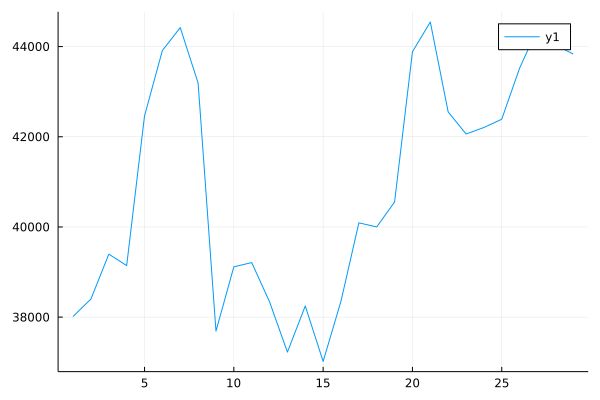

In [11]:
using Plots

plot(dataBitcoin.PriceFloat)

In [12]:
using LinearAlgebra

N = size(dataBitcoin.PriceFloat,1);

x = Array((1:N));

a = ones(N,1);

A = [x.^5 x.^4 x.^3 x.^2 x a];
b = Array(dataBitcoin.PriceFloat);
     
QR_parameters = A\b

6-element Vector{Float64}:
     0.024054609375477615
    -2.1812581772427846
    71.83689108419692
 -1019.22880041066
  5761.0602659803035
 31274.117813145505

In [13]:
using Convex, SCS

A = [x.^5 x.^4 x.^3 x.^2 x a];

b_t = Array(dataBitcoin.PriceFloat);

x_t = Variable(size(A,2))

problem = minimize(sumsquares(A * x_t - b_t), [x_t >= 0])
solve!(problem, SCS.Optimizer, silent_solver = true)

problem.status

Convex_parameters = x_t.value

┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex C:\Users\HOME\.julia\packages\Convex\o98db\src\solution.jl:342


6×1 Matrix{Float64}:
     0.00013304122401125126
     0.002805802810767796
     0.0027821404129352383
     0.0011518544335624797
    -0.00016425125603499426
 40098.15301081102

In [14]:
using CurveFit
x = Array((1:N));
b = Array(dataBitcoin.PriceFloat);

poly_3 = poly_fit(x, b, 3)
poly_4 = poly_fit(x, b, 4)
poly_5 = poly_fit(x, b, 5)

cf_4d = AbstractFloat[]
p4 = reverse(CurveFit_degree_4)

cf_3d = AbstractFloat[]
p3 = reverse(CurveFit_degree_3)

for i in 1:N
    push!(cf_4d, p4[1]*x[i]^4 + p4[2]*x[i]^3 + p4[3]*x[i]^2 + p4[4]*x[i] + p4[5])
end

for i in 1:N
    push!(cf_3d, p3[1]*x[i]^3 + p3[2]*x[i]^2 + p3[3]*x[i] + p3[4])
end

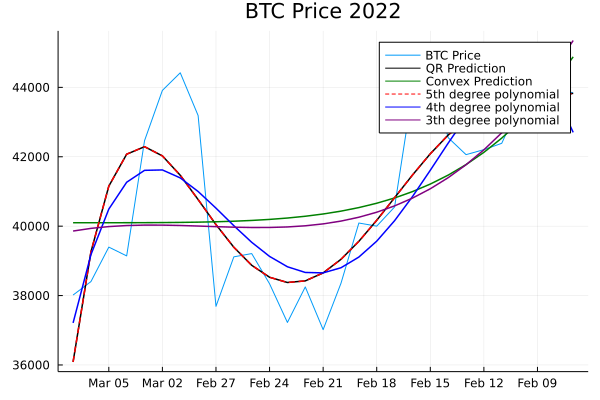

In [18]:
using Plots

function predictions(p, a, b)
    v = AbstractFloat[]
    for i in a:b
        push!(v, p[1]*i^5 + p[2]*i^4 + p[3]*i^3 + p[4]*i^2 + p[5]*i + p[6])
    end
    return v
end


qr_p = predictions(QR_parameters, 1, N)

convex_p = predictions(Convex_parameters, 1, N)

curve_p = predictions(reverse(CurveFit_degree_5), 1, N)


True_value = Array(dataBitcoin.PriceFloat);

plot(dataBitcoin.DateMonth, True_value, title = "BTC Price 2022", label = "BTC Price")

plot!(dataBitcoin.DateMonth, qr_p, linewidth=1.5, color=:black, label = "QR Prediction")

plot!(dataBitcoin.DateMonth, convex_p, linewidth=1.5, color=:green, label = "Convex Prediction")

plot!(dataBitcoin.DateMonth, curve_p, line=:dash, linewidth=1.5, color=:red, label = "5th degree polynomial")

plot!(dataBitcoin.DateMonth, cf_4d, linewidth=1.5, color=:blue, label = "4th degree polynomial")

plot!(dataBitcoin.DateMonth, cf_3d, linewidth=1.5, color=:purple, label = "3th degree polynomial")

In [21]:
dataBitcoinw = CSV.read("1week.csv",DataFrame);

dataBitcoinw.Price .= replace.(dataBitcoinw.Price, "," => "");

dataBitcoinw.PriceFloat = parse.(Float64, dataBitcoinw.Price);


dataBitcoinw.DateMonth = [split(x,',')[1] for x in dataBitcoinw.Date];


dataBitcoinw.Date = Dates.Date.(dataBitcoinw.Date, "u dd, yyyy");


dataBitcoinw = sort(dataBitcoinw, (:Date))

dataBitcoinw

,Date,Price,Open,High,Low,Vol.,Change %,PriceFloat
,Date,String15,String15,String15,String15,String7,String7,Float64
1,2022-03-08,38744.8,"38,020.6","39,351.5","37,886.6",2.67B,1.89%,38744.8
2,2022-03-09,41929.0,"38,731.5","42,538.5","38,663.3",3.60B,8.22%,41929.0
3,2022-03-10,39416.3,"41,933.9","42,029.1","38,603.5",3.62B,-5.99%,39416.3
4,2022-03-11,38730.2,"39,422.5","40,177.0","38,236.4",2.79B,-1.74%,38730.2
5,2022-03-12,38814.3,"38,730.2","39,355.3","38,666.5",1.11B,0.22%,38814.3
6,2022-03-13,37792.4,"38,813.2","39,272.3","37,603.4",1.55B,-2.63%,37792.4
7,2022-03-14,39671.1,"37,789.5","39,914.3","37,613.6",2.33B,4.97%,39671.1
8,2022-03-15,39285.7,"39,673.0","39,854.7","38,220.9",2.25B,-0.97%,39285.7


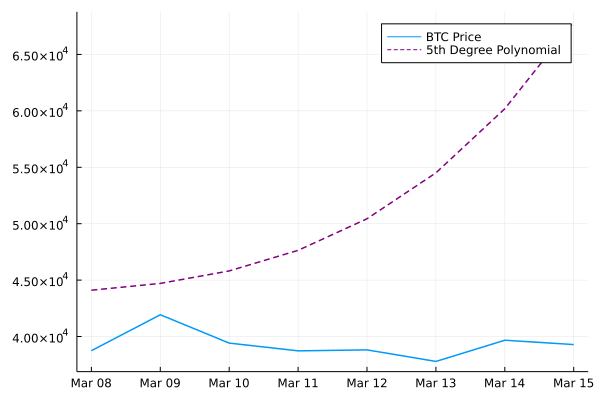

In [22]:
qrpw = predictions(QR_parameters, 30, 37)

plot(dataBitcoinw.DateMonth, dataBitcoinw.PriceFloat, label = "BTC Price", linewidth=1.5)

plot!(dataBitcoinw.DateMonth, qrpw, label = "5th degree polynomial", linewidth=1.5, line=:dash, color=:purple)

In [23]:
convex_pred_week = predictions(Convex_parameters, 30, 37)

8-element Vector{AbstractFloat}:
 45679.904563608114
 46582.21270522051
 47596.7126231478
 48733.46480204728
 50003.10794414389
 51416.87493417713
 52986.60880434791
 54724.77869926546

In [24]:
curve_3_wk = []
p3 = reverse(CurveFit_degree_3)
for i in 30:37
    push!(curve_3_wk , p3[1]*i^3 + p3[2]*i^2 + p3[3]*i + p3[4])
end
curve_3_wk

8-element Vector{Any}:
 46208.12623468488
 47150.769416024625
 48182.38914205316
 49306.92694906911
 50528.32437337112
 51850.522951257844
 53277.46421902792
 54813.08971297998

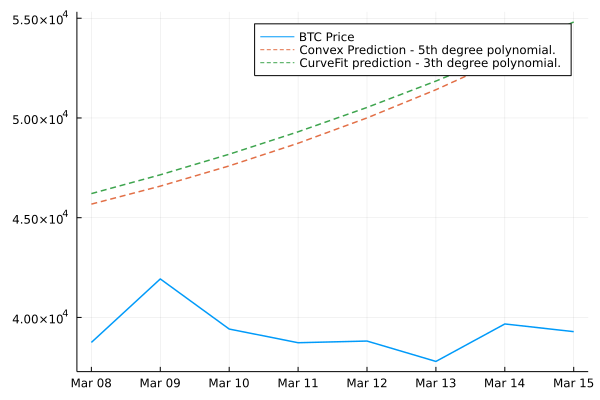

In [26]:
plot(dataBitcoinw.DateMonth, dataBitcoinw.PriceFloat, label = "BTC Price", linewidth=1.5)
plot!(dataBitcoinw.DateMonth, [convex_pred_week, curve_3_wk],
        label = ["Convex Prediction - 5th degree polynomial." "CurveFit prediction - 3th degree polynomial."]
        , linewidth=1.5, line=:dash)